# Part I - (Prosper Loan Dataset)
## by (Semanyoh Nissi Kekeli)

## Introduction




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset
LoanData = pd.read_csv('prosperLoanData.csv')

In [3]:
LoanData.shape

(113937, 81)

In [4]:
LoanData.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

In [5]:
LoanData.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [6]:
# Create a subset of the dataframe with fewer variables for the investigation
LoanData_columns = ['Term', 'LoanStatus', 'BorrowerAPR', 'ProsperRating (Alpha)', 'EmploymentStatus', 'StatedMonthlyIncome', 'LoanOriginalAmount']
LoanData = LoanData[LoanData_columns]

In [7]:
LoanData.describe()

,Term,BorrowerAPR,StatedMonthlyIncome,LoanOriginalAmount
count,113937.000000,113912.000000,1.139370e+05,113937.00000
mean,40.830248,0.218828,5.608026e+03,8337.01385
std,10.436212,0.080364,7.478497e+03,6245.80058
min,12.000000,0.006530,0.000000e+00,1000.00000
25%,36.000000,0.156290,3.200333e+03,4000.00000
50%,36.000000,0.209760,4.666667e+03,6500.00000
75%,36.000000,0.283810,6.825000e+03,12000.00000
max,60.000000,0.512290,1.750003e+06,35000.00000


In [8]:
LoanData.isnull().sum()

Term                         0
LoanStatus                   0
BorrowerAPR                 25
ProsperRating (Alpha)    29084
EmploymentStatus          2255
StatedMonthlyIncome          0
LoanOriginalAmount           0
dtype: int64

In [9]:
LoanData.dropna(inplace=True)

In [10]:
LoanData.isnull().sum().sum()

0

### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each 
loan. It also contained some null values which have now been filled with "Unknown". Majority of the variables are numeric in nature.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in Borrower APR. What affects the borrower’s APR 
or interest rate?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Regardless of all the features in the dataset. I believe the following features will help in determining a loan's outcome status.
> ##### 1. Debt to income ratio
> ##### 2. EmploymentStatus
> ##### 3. Prosper rating(alpha)
> ##### 4. Term
> ##### 5. Credit Score
> ##### 6. ListingCategory
> ##### 7. Loan original amount


## Univariate Exploration

#### Taking into consideration the main feature: BorrowerAPR

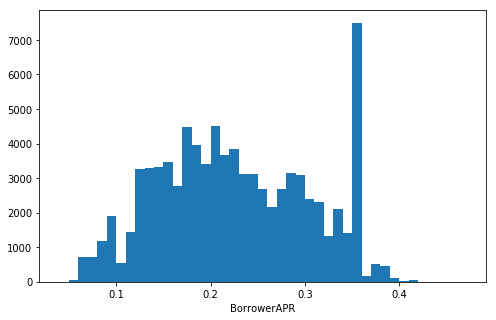

In [11]:
# Plot histogram
bins = np.arange(0.04, LoanData['BorrowerAPR'].max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = LoanData, x = 'BorrowerAPR', bins=bins);
plt.xlabel('BorrowerAPR');

Looking at the plot it appears multimodial. There is a small peak at 0.1, two peaks at both sides of 0.2 and another peak at 0.2. The highest peak is at 0.36 with few Borrower APRs more than 0.4

#### Plotting distributions for the qualitative variables (term, prosper rating, loan status) 

#### How are the Prosper ratings distributed?

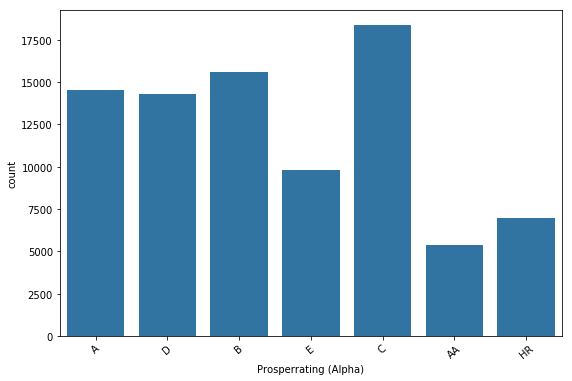

In [12]:
# Function for countplot distributions
def count_plot(data, column_name):
    plt.figure(figsize=[9,6])
    data = LoanData
    base_color = sb.color_palette()[0]
    ax = sb.countplot(x = LoanData[column_name], color = base_color)
    plt.xticks(rotation=40)
    plt.xlabel(column_name.title())
    plt.show()



count_plot(LoanData, 'ProsperRating (Alpha)');

"C" is the most common rating followed by "B","A" and "A" respectively. The least common rating is "AA".

#### What are the frequencies of the terms?

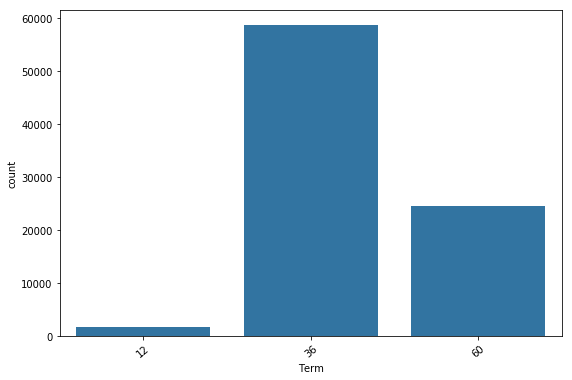

In [13]:
count_plot(LoanData, 'Term')

The most common duration of loan length is 36 months with the least being 12 months.

In [14]:
#### What is the most frequent loan status? How are the rest distributed?

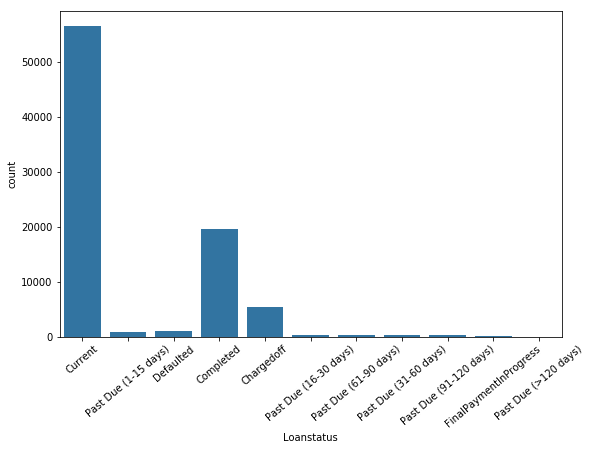

In [15]:
count_plot(LoanData, 'LoanStatus');

The status of majority of the the loans taken is "Current" followed by "Completed" and "Chargedoff" respectively. The least fall in the categories "Past Due","Defaulted" and "FinalPaymentInProgress"

#### What is the percentage of the most common employment status?

In [16]:
employmentstatus_counts = LoanData.EmploymentStatus.value_counts()
employmentstatus_counts

Employed         67310
Full-time         7927
Self-employed     4538
Other             3806
Not employed       649
Retired            367
Part-time          256
Name: EmploymentStatus, dtype: int64

In [17]:
sum_employmentstatus = LoanData.EmploymentStatus.value_counts().sum()
employmentstatus_order = employmentstatus_counts.index
employmentstatus_order

Index(['Employed', 'Full-time', 'Self-employed', 'Other', 'Not employed',
       'Retired', 'Part-time'],
      dtype='object')

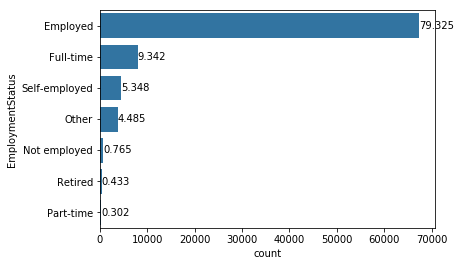

In [18]:
base_color = sb.color_palette()[0] 
sb.countplot(data=LoanData, y='EmploymentStatus', color=base_color, order=employmentstatus_order);

for i in range (employmentstatus_counts.shape[0]):
    #employmentstatus_counts is the frequency of the values in 'EmploymentStatus' column
    count_ = employmentstatus_counts[i]
    #convert count to percentage, then to string
    prct_string = '{:0.3f}'.format(100*count_/sum_employmentstatus)
    #Print the string value on the bar
    plt.text(count_+1, i, prct_string, va='center');

The percentage of Employed is 79.325 which is the most with the least being Part-time with 0.302.

#### Exploring the variables LoanOriginalAmount and StatedMonthlyIncome

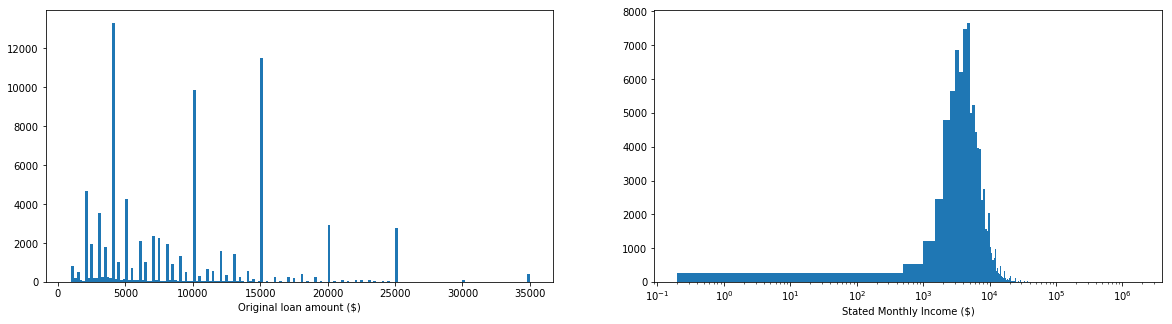

In [19]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
bins = np.arange(800, LoanData.LoanOriginalAmount.max()+200, 200)
plt.hist(data = LoanData, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)');

plt.subplot(1,2,2)
s_bins = np.arange(0.2, LoanData.StatedMonthlyIncome.max()+500, 500)
plt.hist(data = LoanData, x = 'StatedMonthlyIncome', bins = s_bins);
plt.xlabel('Stated Monthly Income ($)');
plt.xscale('log');


More than half of the original loan amounts are 10000 and below.The highest loan amount is 35000 and the lowest is 1000; both of which are the least frequent amounts. 

The minimum wage per month in US has been at least more than 500 dollars since 1980 and over 1000 dollars since 2009.
For the purpose of this analysis, let's consider only borrowers with stated monthly income between 1000 and 15000 dollars.

In [20]:
# Return Stated Monthly Income between 1000 and 15000
LoanData = LoanData[LoanData.StatedMonthlyIncome>= 1000]
LoanData = LoanData[LoanData.StatedMonthlyIncome<= 15000]

In [21]:
LoanData = LoanData.reset_index(drop=True)

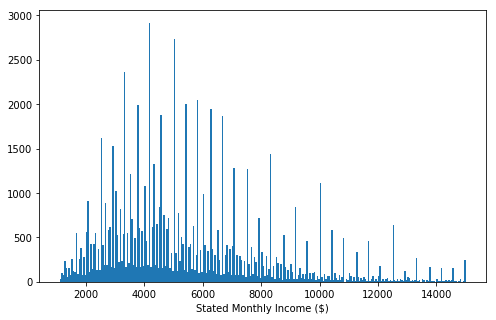

In [22]:
# Plot a new hist for Stated Monthly Income
bins = np.arange(1100, LoanData.StatedMonthlyIncome.max()+50, 50);
plt.figure(figsize=[8, 5])
plt.hist(data = LoanData, x = 'StatedMonthlyIncome', bins=bins);
plt.xlabel('Stated Monthly Income ($)');

The top two highest peaks fall between 4000 to 6000 dollars

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution appears to be multimodial. The highest peak is at 0.36 with few Borrower APRs more than 0.4. There were no unsusual points and no transformations were performed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The descriptive statistics showed that stated monthly income variable had some outliers. I cleaned the data removing the outliers and created a new range from 1000 to 15000 dollars for the purpose of the analysis, which was seen to be multimodal.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Exploring the relationship between Borrower APR and both Original Loan Amount and Stated Monthly Income.¶

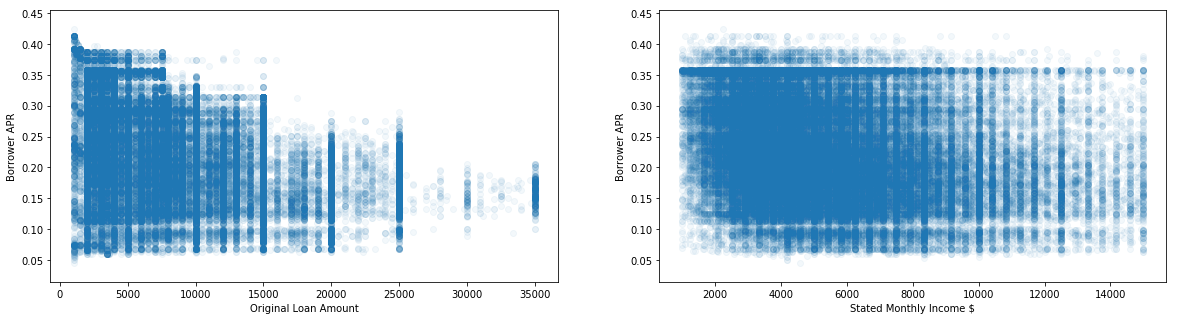

In [23]:
# Scatter plot of Borrower APR against Original Loan Amount
plt.figure(figsize=[20, 5])

plt.subplot(1,2,1)
plt.scatter(data=LoanData, y='BorrowerAPR', x='LoanOriginalAmount', alpha=1/20);
plt.ylabel('Borrower APR');
plt.xlabel('Original Loan Amount');

# Scatter plot of Borrower APR against Stated Monthly Income
plt.subplot(1,2,2)
plt.scatter(data=LoanData, y='BorrowerAPR', x='StatedMonthlyIncome', alpha=1/20);
plt.ylabel('Borrower APR');
plt.xlabel('Stated Monthly Income $');

From the left plot we see that as the loan amount increases the borrower APR range becomes smaller. We observe that loan amounts between 30000 and 35000 have an APR between the range of 0.10 and 0.20.

#### Use of heatmap to further explore the correlation betweeen BorrowerAPR and StatedMonthlyIncome

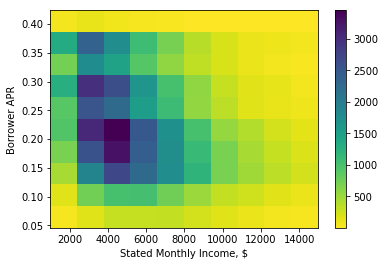

In [24]:
plt.hist2d(data=LoanData, x='StatedMonthlyIncome', y='BorrowerAPR', cmin=0.5, cmap='viridis_r');
plt.colorbar()
plt.xlabel('Stated Monthly Income, $');
plt.ylabel('Borrower APR');

We see from the heatmap that stated monthly income doesn't have a clear correlation with Borrower APR just as with the scatterplot. However we also see that for incomes between 4000 and 6000, the most frequent APR offered is in the range of 0.12 and 0.22.

#### How does Prosper Rating affect Borrower APR?

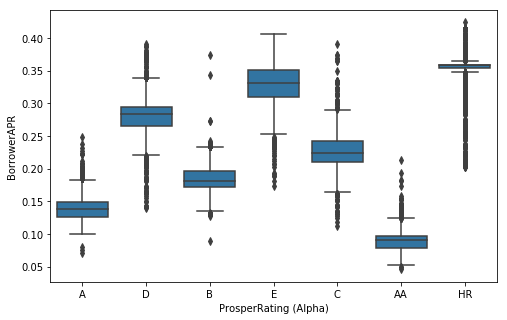

In [25]:
# Boxplot of Prosper rating against Borrower APR
plt.figure(figsize=[8,5]);
sb.boxplot(data=LoanData, x='ProsperRating (Alpha)', y='BorrowerAPR', color=base_color);

There is a strong correlation between Prosper rating and Borrower APR. The better the Prosper rating, the lower the APR. The median APR for Borrower's with Prosper rating AA is 0.10, although there are some outliers. Overall, the median APR decreases with respect to Prosper Rating from the worst HR to the best rating AA.

#### What is the relationship between the categorical variables, Prosper Rating, Loan Term and Employment Status?

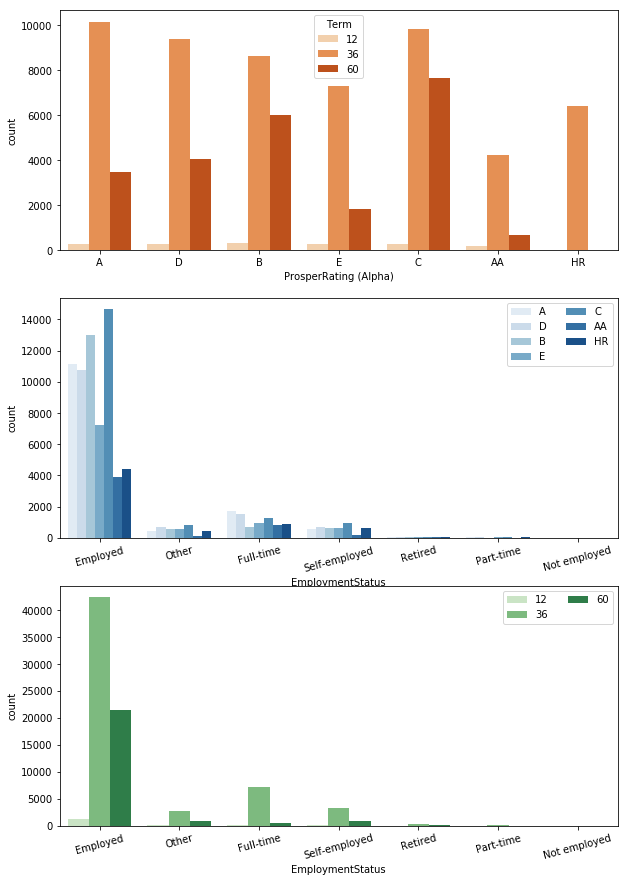

In [26]:
plt.figure(figsize = [10, 15])

# subplot 1: Prosper rating vs Term
plt.subplot(3, 1, 1)
sb.countplot(data = LoanData, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Oranges');

# subplot 2: Employment status vs Prosper rating
ax = plt.subplot(3, 1, 2)
sb.countplot(data = LoanData, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues');
ax.legend(loc = 1, ncol = 2);
plt.xticks(rotation=15)

# subplot 3: Term vs Employment status
ax = plt.subplot(3, 1, 3)
sb.countplot(data = LoanData, x = 'EmploymentStatus', hue = 'Term', palette = 'Greens');
ax.legend(loc = 1, ncol = 2);
plt.xticks(rotation=15);

> The most common loan term for the various Prosper ratings is 36 months, followed by 60 months. Also, the total count of the worst Prosper rating HR is for the 36-month term. 

> The most common loan term for employment status types is 36 months. 

> The mode prosper rating for employed, other and fulltime are C, C and A respectively. There isn't enough data on the remaining employment statuses to made an observation from the plot.

#### What is the relationship between Prosper Rating and Stated Monthly Incomes and Loan Amounts?

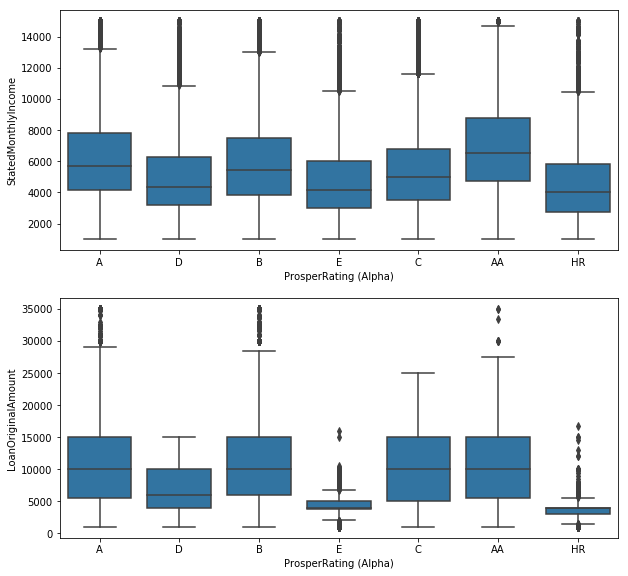

In [27]:
plt.figure(figsize = [10, 15])

# subplot 1: Prosper rating vs Stated Monthly Income
plt.subplot(3, 1, 1)
sb.boxplot(data=LoanData, x='ProsperRating (Alpha)', y='StatedMonthlyIncome', color=base_color);

# subplot 2: Prosper rating vs. Original Loan Amount
ax = plt.subplot(3, 1, 2)
sb.boxplot(data=LoanData, x='ProsperRating (Alpha)', y='LoanOriginalAmount', color=base_color);

The median and maximum value of stated monthly incomes increases with better Prosper ratings. Also, median of loan amounts increased with improving Prosper ratings (from HR to C) and was then observed to be the same from C to AA. The maximum loan amounts increased from HR to AA.

#### What is the relationship between Loan Term and Borrower APR, Status Monthly Income, Loan Original Amount?

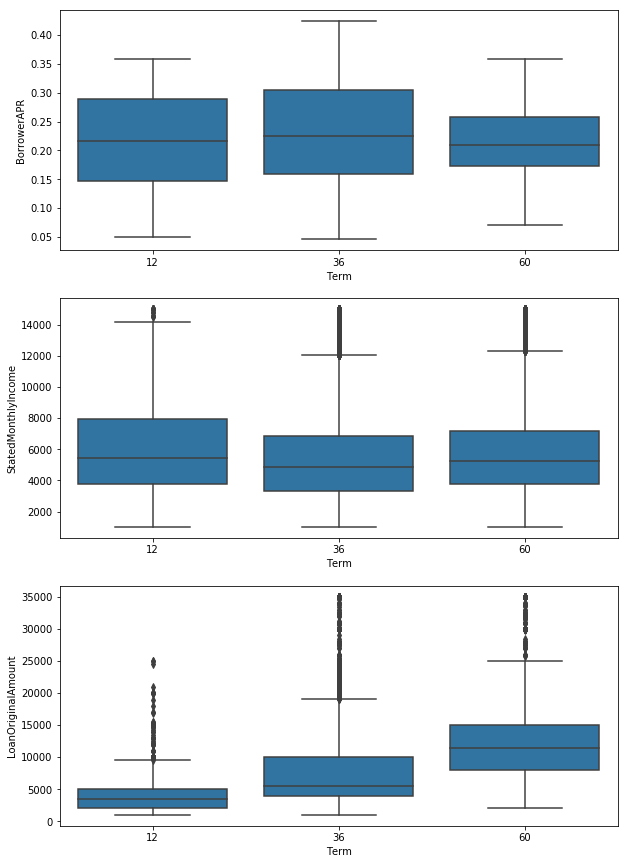

In [28]:
plt.figure(figsize = [10, 15])

# subplot 1: Loan Term vs Borrower APR
plt.subplot(3, 1, 1)
sb.boxplot(data=LoanData, x='Term', y='BorrowerAPR', color=base_color);

# subplot 2: Loan Term vs Stated Monthly Income
ax = plt.subplot(3, 1, 2)
sb.boxplot(data=LoanData, x='Term', y='StatedMonthlyIncome', color=base_color);

# subplot 3: Loan Term vs. Original Loan Amount
ax = plt.subplot(3, 1, 3)
sb.boxplot(data=LoanData, x='Term', y='LoanOriginalAmount', color=base_color);

The median APRs for all loan terms are very close (a little over the 0.20 mark). The median stated monthly incomes based on loan term are also very close, falling just below the 6000 mark. The median, minimum and maximum loan amounts taken by borrower's increase as the loan term increases.

#### What is the relationship between Employment Status and Borrower APR, Status Monthly Income, Loan Original Amount?

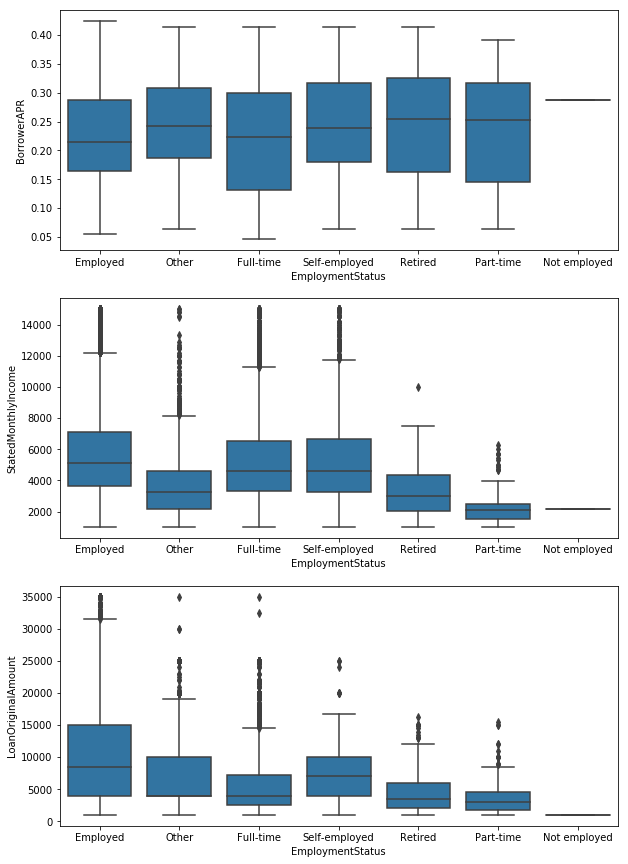

In [29]:
plt.figure(figsize = [10, 15])

# subplot 1: Employment Status vs Borrower APR
plt.subplot(3, 1, 1)
sb.boxplot(data=LoanData, x='EmploymentStatus', y='BorrowerAPR', color=base_color);

# subplot 2: Employment Status vs Stated Monthly Income 
ax = plt.subplot(3, 1, 2)
sb.boxplot(data=LoanData, x='EmploymentStatus', y='StatedMonthlyIncome', color=base_color);

# subplot 2: Emmployment Status vs Original Loan Amount
ax = plt.subplot(3, 1, 3)
sb.boxplot(data=LoanData, x='EmploymentStatus', y='LoanOriginalAmount', color=base_color);

Those employed had a lower (better) median APR, although the minimum and maximum APR values for the employed are still 0.5 and 4.2 respectively. Those employed and in full-time as well had the highest median incomes and highest maximum monthly incomes. Also those employed had the highest median loan amounts and highest maximum loan amounts.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> There is a strong correlation between Prosper rating and Borrower APR. The better the Prosper rating, the lower the APR. The median APR for Borrower's with Prosper rating AA is 0.10, although there are some outliers. Overall, the median borrower APR decreases with respect to Prosper Rating from the worst HR to the best rating AA.

> Those employed had a lower (better) median borrower APR, although the minimum and maximum APR values for the employed are still 0.5 and 4.2 respectively.

> The median borrowed APRs for all loan terms are very close (a little over the 0.20 mark).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Those employed had a lower (better) median borrower APR, although the minimum and maximum APR values for the employed are still 0.5 and 4.2 respectively. Those employed and in full-time as well had the highest median incomes and highest maximum monthly incomes which is expected. Also those employed had the highest median loan amounts and highest maximum loan amounts.

## Multivariate Exploration



#### How does Prosper Rating affect the relationship between Borrower APR and Original Loan Amount?

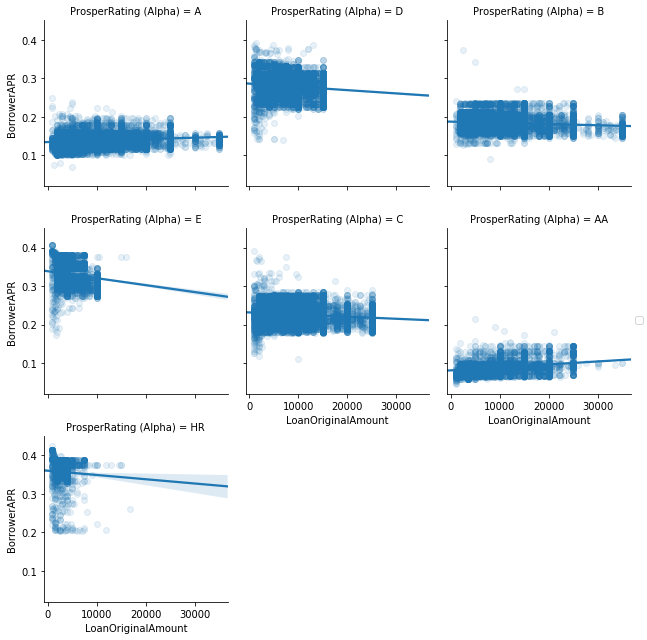

In [30]:
# Use faceting to explore the effect Prosper Rating can have on the relationship between Borrower APR and loan amount
g=sb.FacetGrid(data=LoanData, col='ProsperRating (Alpha)', col_wrap=3);
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':1/10});
g.add_legend();

It is observed that improving Prosper rating (from HR to AA) results in higher loan amounts and improving (lower) borrower APR. However, we also observe that the correlation between the APR and loan amount becomes slightly positive for A and AA ratings, meaning the APR is likely to increase for people with these ratings when they are taking very high loans. Even then, the APR for A and AA ratings are still the least.

#### How are Loan amounts affected by Term and Prosper rating? Also explore the relationship of Stated monthly incomes with the Term and Prosper rating?

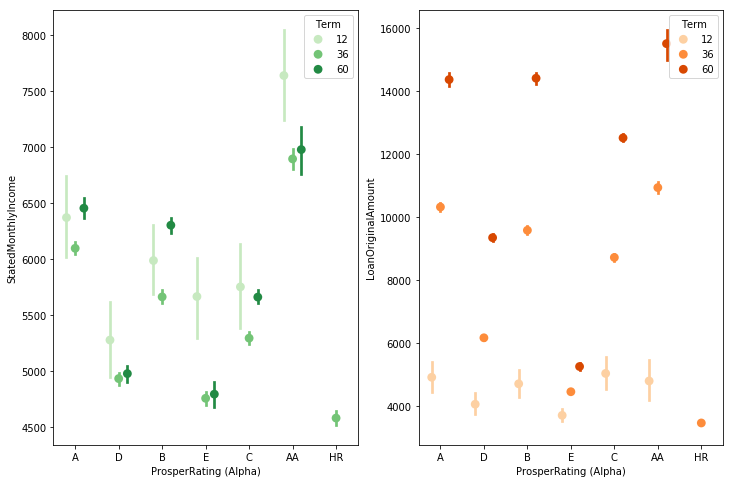

In [31]:
# Plot two pointplots using subplots
fig, ax = plt.subplots(ncols=2, figsize=[12,8])
sb.pointplot(data = LoanData, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term', palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[0]);
sb.pointplot(data = LoanData, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term', palette = 'Oranges', linestyles = '', dodge = 0.4, ax=ax[1]);

The stated monthly income increases with better ratings for all terms. Interestingly though, for 12 month term, the stated income doesnt fall below 5000 for the worst ratings. This may be an indication that short term loans are only given to borrowers with ratings from D downwards if they have a baseline monthly income of $5000.

For the second plot, we observe that for 60-month and 36-month terms, higher loans are given to borrowers as their ratings improve. However, loans are capped below $6000 for borrowers taking a 12-month loan regardless of their ratings.

#### How is Borrower APR affected by Term and Prosper rating?

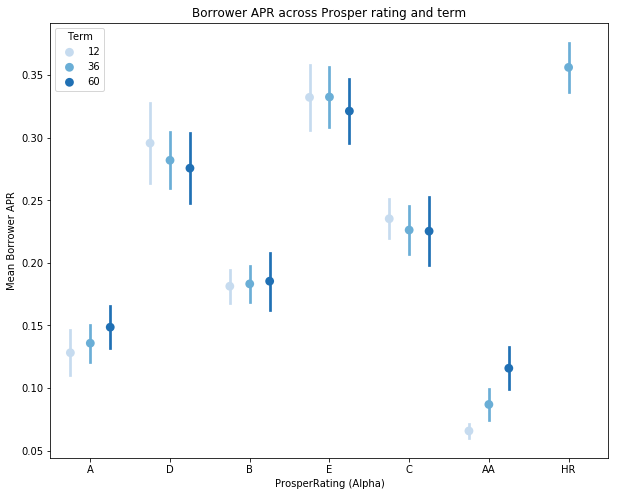

In [32]:
# Explore the relationship between borrower APR, Term and Prosper Rating
fig = plt.figure(figsize = [10,8])
ax = sb.pointplot(data = LoanData, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term', palette = 'Blues', ci='sd', linestyles = '', dodge = 0.5);
plt.title('Borrower APR across Prosper rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

For people with B to AA ratings, the borrower APR increases with increasing loan term.The borrower APR decreases with the increasing loan term for borrowers with HR to C ratings.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> For people with B to AA ratings, the borrower APR increases with increasing loan term.The borrower APR decreases with the increasing loan term for borrowers with HR to C ratings.
> Yes, as loan term increases the APR range reduces as the loan amount increases.

### Were there any interesting or surprising interactions between features?

> Loans are capped below 6000 for borrowers taking a 12-month loan regardless of their ratings. This is not same for 36 and 60-month loans.

## Conclusions

> 1. Borrower APR is affected by the loan amount, as loan amount increases the borrower APR range becomes smaller.

> 2. Prosper Rating has a strong effect on Borrower APR; with improving Prosper rating there is lower Borrower APR. Even as the loan amount increases, this general trend is still evident. However, when borrower with the best two Prosper ratings are taking very high loans, their APR is slightly increased. This may be to deter highly rated borrowers from taking higher loans since other plots also showed that borrowers with the best ratings generally take higher loans. It may also be that Prosper (lending company) wants to make profit since a slight increase in APR on a high loan is still very substantial.

> 3. Another finding is that for very highly rated borrowers, their APR increases when they choose a longer loan term. However, for borrowers with ratings from HR to C, their APR reduces if they choose a longer term.

> 4. Short term (12-month) loans are capped below 6000 dollars regardless of Prosper rating of the borrower.